In [1]:
%load_ext lab_black

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    LassoCV,
    RidgeCV,
)
from sklearn.metrics import mean_squared_error

In [3]:
DATA_DIR = os.path.join("..", "data")
TRAIN_CSV_PATH = os.path.join(DATA_DIR, "train.csv")
TEST_CSV_PATH = os.path.join(DATA_DIR, "test.csv")
TARGET = "progression"

In [4]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
X_train = train_df.drop(TARGET, axis=1).values
y_train = train_df[TARGET].values

In [5]:
test_df = pd.read_csv(TEST_CSV_PATH)
X_test = test_df.drop(TARGET, axis=1).values
y_test = test_df[TARGET].values

In [6]:
feature_names = train_df.drop(TARGET, axis=1).columns

### EDA

In [7]:
plot_df = pd.concat([train_df, test_df])
display_order = ["progression", *plot_df.columns.drop("progression")]
plot_df = plot_df[display_order]

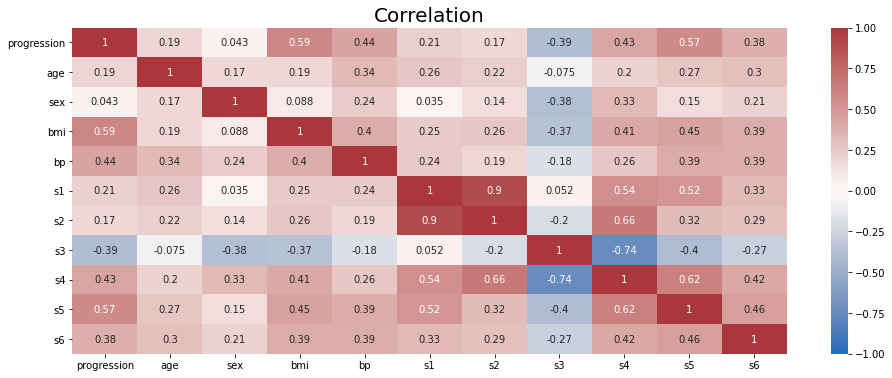

In [8]:
def plot_save_correlation():
    plt.figure(figsize=(16, 6))

    sns.heatmap(plot_df.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap="vlag")

    plt.title("Correlation", fontsize=20)

    plt.savefig("../static/correlation.png", format="png")
    plt.show()


plot_save_correlation()

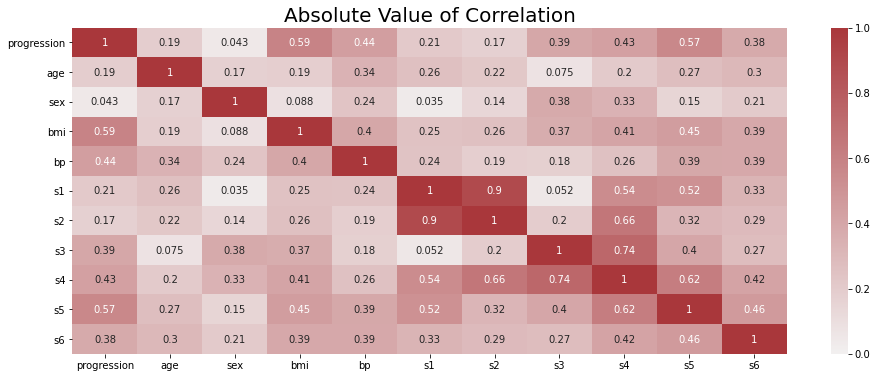

In [9]:
def plot_save_abs_correlation():
    plt.figure(figsize=(16, 6))

    sns.heatmap(
        plot_df.corr().abs(),
        vmin=0,
        vmax=1,
        annot=True,
        cmap=sns.color_palette("light:#a9373b", as_cmap=True),
    )

    plt.title("Absolute Value of Correlation", fontsize=20)

    plt.savefig("../static/abs_correlation.png", format="png")
    plt.show()


plot_save_abs_correlation()

### Linear Regression

In [10]:
linear_regression = make_pipeline(StandardScaler(), LinearRegression())
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [11]:
mean_squared_error(y_test, linear_regression.predict(X_test))

2900.1732878832327

In [12]:
linear_regression_coef = linear_regression[-1].coef_

In [13]:
list(zip(feature_names, linear_regression_coef))

[('age', 1.753586470776238),
 ('sex', -11.511898812668163),
 ('bmi', 25.606979573562278),
 ('bp', 16.82909953486284),
 ('s1', -44.44753934169174),
 ('s2', 24.640086878215367),
 ('s3', 7.676204996814376),
 ('s4', 13.138408649969096),
 ('s5', 35.16068783888524),
 ('s6', 2.3513862343830714)]

### Lasso Regression

In [14]:
lasso_cv = make_pipeline(StandardScaler(), LassoCV())
lasso_cv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lassocv', LassoCV())])

In [15]:
mean_squared_error(y_test, lasso_cv.predict(X_test))

2800.4843916325653

In [16]:
lasso_cv_coef = lasso_cv[-1].coef_

In [17]:
lasso_cv[-1].alpha_

1.6552151706972253

In [18]:
list(zip(feature_names, lasso_cv_coef))

[('age', 0.0),
 ('sex', -7.9806806591971355),
 ('bmi', 26.185514782152282),
 ('bp', 15.042067071866205),
 ('s1', -4.805475406311894),
 ('s2', -0.0),
 ('s3', -11.072005148862326),
 ('s4', 0.0),
 ('s5', 21.96222605365262),
 ('s6', 1.7387714671585073)]

### Ridge Regression

In [19]:
ridge_cv = make_pipeline(StandardScaler(), RidgeCV())
ridge_cv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])

In [20]:
mean_squared_error(y_test, ridge_cv.predict(X_test))

2891.9980521078182

In [21]:
ridge_cv_coef = ridge_cv[-1].coef_

In [22]:
ridge_cv[-1].alpha_

1.0

In [23]:
list(zip(feature_names, ridge_cv_coef))

[('age', 1.8071866467212772),
 ('sex', -11.448279529900617),
 ('bmi', 25.73255227956571),
 ('bp', 16.734555098556463),
 ('s1', -34.67081582551714),
 ('s2', 17.05230020127047),
 ('s3', 3.3692434218043275),
 ('s4', 11.76396047629234),
 ('s5', 31.377918941512366),
 ('s6', 2.4581605389598025)]

### Coefficient Plot

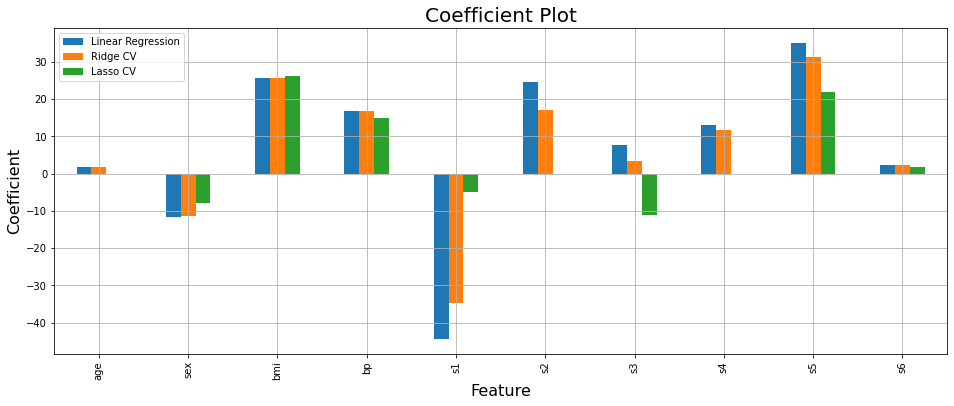

In [24]:
def plot_save_coefficient():

    pd.DataFrame(
        {
            "Linear Regression": linear_regression_coef,
            "Ridge CV": ridge_cv_coef,
            "Lasso CV": lasso_cv_coef,
        },
        index=feature_names,
    ).plot.bar(
        figsize=(16, 6),
        grid=True,
    )
    plt.title("Coefficient Plot", fontsize=20)
    plt.xlabel("Feature", fontsize=16)
    plt.ylabel("Coefficient", fontsize=16)

    plt.savefig("../static/coefficient.png", format="png")
    plt.show()


plot_save_coefficient()